<a href="https://colab.research.google.com/github/jong104b-kr/AIFFEL_quest_cr/blob/master/jellyfish_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ResNet으로 학습, 평가

In [ ]:
# dlthon m1 comments
# wandb 설치, 버전은 0.19.8
!pip install wandb==0.19.8

In [ ]:
# pytorch, torchvision, wandb 설치
!pip install torch torchvision wandb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 76.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
# torch, nn은 neural networks, optim에 Adam, RMSprop 등 포함(optimization)
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
import wandb

In [ ]:
# 로그인
wandb.login()

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: jong104b (jong104b-home) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [ ]:
# w&b 초기화, 프로젝트명, 이번 학습 구분, 하이퍼파라미터 설정
wandb.init(
    project = "jellyfish-classification",
    name = "resnet50-baseline",
    config = {
        "epochs": 5,
        "batch_size": 32,
        "learning_rate": 0.001,
        "model": "ResNet-50"
    }
)

# config 딕셔너리 접근
config = wandb.config

In [ ]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 사진자료 경로 매크로 설정
data_dir = "/content/drive/MyDrive/AIFFEL_DLTHON/Train_Test_Valid"

In [ ]:
# 이미지 리사이즈, 파이토치 텐서로 변환, 정규화
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
# 폴더로부터 훈련 데이터 로드하기
train_dataset = datasets.ImageFolder(root=data_dir + '/Train', transform=transform)
val_dataset = datasets.ImageFolder(root=data_dir+'/valid', transform= transform)

In [ ]:
# 데이터로더 설정(?)
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

# 자료의 길이 출력
print(f"Train데이터: {len(train_dataset)}장 / Validation 데이터: {len(val_dataset)}장")

Train데이터: 900장 / Validation 데이터: 39장


In [ ]:
# 파이토치를 돌릴 때 GPU가 있다면 선택 없으면 CPU 선택
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
# 사전학습한 resnet50 모델 사용
model = models.resnet50 (pretrained = True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 112MB/s]


In [ ]:
# 입력 특성의 갯수 2048 설정, 출력 클래스 갯수 설정, model.fc층에 nn.Linear층 대입
# 모델을 장치로 이동함
model.fc = nn.Linear(model.fc.in_features, len(train_dataset.classes))
model = model.to(device)

In [ ]:
# 다중분류에 사용하는 손실함수 설정, 최적화 함수 설정, SGD함수보다 수렴하는 속도가 빠름
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

In [ ]:
# 학습루프 설정
for epoch in range(config.epochs):
    model.train() # 모델을 학습모드로 변경
    train_loss =0 # 손실 초기화
    correct = 0 # 정확도 추적 초기화

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device) # 자료를 장치로 이동
        optimizer.zero_grad() # 그레이디언트 초기화

        outputs = model(images) # 순전파
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 가중치 업데이트

        train_loss += loss.item() # 누적 손실 추적
        correct += (outputs.argmax(1) == labels).sum().item() # 제대로 예측한 개수 추적

    train_acc = correct / len(train_loader.dataset) # 학습 정확도 계산

    model.eval() # 모델을 평가 모드로 설정
    val_loss = 0 # 평가 손실 초기화
    val_correct = 0 # 평가 정확도 초기화

    with torch.no_grad(): # 불필요한 그레이디언트 계산 방지
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device) # 이미지와 라벨을 GPU로 이동(?)
            outputs = model(images) # 출력 계산
            loss = criterion(outputs, labels) # 손실함수
            val_loss += loss.item() # 총 평가손실 계산
            val_correct += (outputs.argmax(1) == labels).sum().item()

    val_acc = val_correct / len(val_loader.dataset) # 평가 정화도 산출

    # wandb를 통해 핵심지표를 추적함, 반복횟수, 훈련:손실, 훈련 정확도, 평가 소실, 평가 정확도
    wandb.log({
        "Epoch": epoch + 1, # 반복횟수
        "Train :Loss": train_loss / len(train_loader), # 학습:손실
        "Train Accuracy": train_acc, # 학습 정확도
        "Validation Loss": val_loss / len(val_loader), # 평가 손실
        "Validation Accuracy": val_acc # 평가 정확도
    })

    # 화면출력
    print(f"Epoch [{epoch+1}/ {config.epochs}],"
          f"Train Loss: {train_loss/ len(train_loader):.4f},"
          f"Val Loss: {val_loss/len(val_loader): .4f},"
          f"Val Acc: {val_acc:.4f}")

Epoch [1/ 5],Train Loss: 1.3123,Val Loss:  4.1793,Val Acc: 0.3077
Epoch [2/ 5],Train Loss: 0.8221,Val Loss:  2.5642,Val Acc: 0.4872
Epoch [3/ 5],Train Loss: 0.7380,Val Loss:  1.3847,Val Acc: 0.5897
Epoch [4/ 5],Train Loss: 0.5742,Val Loss:  3.5272,Val Acc: 0.5128
Epoch [5/ 5],Train Loss: 0.3807,Val Loss:  2.2938,Val Acc: 0.6154


In [ ]:
# 저장
torch.save(model.state_dict(), "/content/drive/MyDrive/AIFFEL_DLTHON/jellyfish-resnet50.pth")

예측 결과:barrel_jellyfish


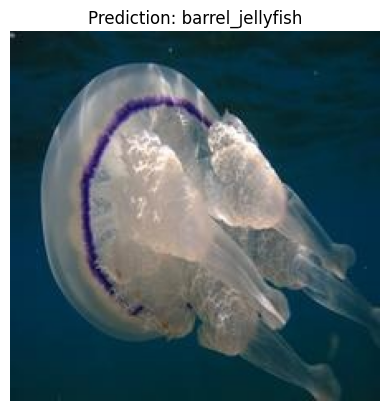

In [ ]:
##사진 한 장 실험##

# Pillow 라이브러리로부터 이미지 들여오기
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 경로 설정
image_path = '/content/drive/MyDrive/AIFFEL_DLTHON/Train_Test_Valid/test/barrel_jellyfish/08.jpg'

# RGB 세개의 채널을 가지는 이미지 확인
image = Image.open(image_path).convert('RGB')

# 이미지 리사이즈, 파이토치 텐서로 변환, 정규화
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std = [0.229, 0.224, 0.225])
])

# 이미질르 변환할 수 있도록 하고, 배치 차원을 추가하고, 입력값을 GPU,CPU로 이동시키다.
input_image = transform(image).unsqueeze(0).to(device)

# 추론을 하기 전에 평가함수를 호출해야 한다.
model.eval()

# 그레이디언트 추적을 하지 않는다, 속도가 빨라짐
with torch.no_grad():
    # 순전파 실행
    output = model(input_image)
    pred = output.argmax(1).item()

# 클래스 이름 출력
class_name = train_dataset.classes[pred]
print(f"예측 결과:{class_name}")

# 시각화
plt.imshow(image)
plt.title(f"Prediction: {class_name}")
plt.axis('off')
plt.show()

In [ ]:
##test data 전체 데이터 실험##

# /test 폴더 안의 서브폴더(클래스별 폴더)를 자동으로 라벨링
# ResNet에 맞게 resize,tenser화,normalize 등을 수행
test_dataset = datasets.ImageFolder(root=data_dir+'/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

# 모델을 평가모드로 전환
model.eval()
test_correct = 0

# 테스트 정확도를 계산하고 보기 좋게 출력하는 스크립트
# 불필요한 그레이디언트 비활성화, 속도 향상
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
	# 각 이미지에 대해 예측된 클래스 인덱스, 맞춘 갯수 누적하기
        test_correct += (outputs.argmax(1) == labels).sum().item()

# 테스트 정확도 계산 및 출력
test_acc = test_correct / len(test_loader.dataset)
print(f"테스트 정확도:{test_acc*100:.2f}%")

테스트 정확도:75.00%


#ResNet결과 히트맵으로 나타내기

In [ ]:
# 파이선 환경에 grad-cam 설치, 딥러닝의 시각적 설명에 활용
!pip install grad-cam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 40.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for grad-cam: filename=grad_cam-1.5.4-py3-none-any.whl size=39680 sha256=0b403379c054f0bb0ed7a518e209d958f232d215f8947c0d723c006b207cfa9b
  Stored in directory: /root/.cache/pip/wheels/8b/0d/d2/b12bec1ccc028921fb98158042ade2d19dae73925dfc636954
Successfully built grad-cam


In [ ]:
# grad-cam 에 필요한 모듈 호출
import torch
from torchvision import models,transforms
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

In [ ]:
# GPU 사용가능할 때 설정 그렇지 않을 경우 CPU 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ResNet 모델을 6개 클래스에 맞게 조정하고 추론상태 준비
model = models.resnet50(pretrained=False)
# ResNet 아키텍처를 가중치 없이 기본 구조만 로드
model.fc= torch.nn.Linear(model.fc.in_features, 6)
# 출력 레이어를 6개의 클래스를 위한 FC Layer로 변경
model.load_state_dict(torch.load("/content/drive/MyDrive/AIFFEL_DLTHON/jellyfish-resnet50.pth"))
# .pth 파일에서 가중치 가져옴
model = model.to(device)
# 평가하기
model.eval()

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
# 경로 설정
image_path = '/content/drive/MyDrive/AIFFEL_DLTHON/Train_Test_Valid/test/compass_jellyfish/04.jpg'

# 이미지를 불러올 때 가장 안정적인 전처리방식
image = Image.open(image_path).convert('RGB')

# transform은 ResNet50등 ImageNet 기반모델에 최적화된 표준 전처리 방식
transform = transforms.Compose([
    transforms.Resize((224,224)), # 이미지 크기 변경, (ResNet 입력 크기)
    transforms.ToTensor(), # 텐서 변환
    transforms.Normalize(mean=[0.485,0.456,0.406], # 이미지넷 평균
                         std =[0.229,0.224,0.225]) # 이미지넷 표준편차
])

# 이미지 전처리, 배치차원추가, GPU 또는 CPU로 전송
input_tensor = transform(image).unsqueeze(0).to(device)

# GradCam용 RGB이미지 준비
rgb_img=transforms.ToTensor()(image).permute(1,2,0).numpy()

In [ ]:
# GradCam이 어디서 이미지를 추출할지 지정
target_layer = model.layer4[-1]

# GPU의 경우 성능이 좋아지고, CPU환경에서 자동 fallback
cam= GradCAM(model=model, target_layers= [target_layer])

# 모델 추론
output = model(input_tensor)
class_name = train_dataset.classes[pred_class]
plt.title(f"Prediction: {class_name}")

# 특정 클래스에 대한 시각화
targets = [ClassifierOutputTarget(pred_class)] # 모델이 예측한 클래스를 대상으로 CAM생성
grayscale_cam = cam(input_tensor=input_tensor, targets= targets)[0]

# 원본 이미지 위에 겹쳐서 시각화하는 마지막 단계, rgb_img 주의사항 확인하기
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

plt.imshow(visualization) # 시각화된 이미지 표시
plt.title(f"Prediction: {train_dataset.classes[pred_class]}") # 예측한 클래스 이름 출력
plt.axis('off') # 축 제거
plt.show() # 화면에 출력

NameError: name 'pred_class' is not defined

#Efficient Net으로 학습 및 실험

In [ ]:
# 파이토치 프레임워크, 토치비전, wandb, 에피션트넷 설치
!pip install torch torchvision wandb efficientnet_pytorch

  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=54beab69f96f0db7d466e435b1352f8920ba6c0691d0a09b6bb675b2e1854abc
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
Successfully built efficientnet_pytorch


In [ ]:
import torch # 모델구성, 손실함수, 옵티마이저 등
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms # 이미지 데이터셋 처리용 도구
from efficientnet_pytorch import EfficientNet # 에피션트넷 모델
import wandb # 실험로깅, 시각화, 하이퍼파라미터 관리

In [ ]:
# wandb와 현재 세션 연결
wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [ ]:
wandb.init(
    project = 'jellyfish-classification', # 프로젝트 이름
    name='efficientnet-b0', # 실험 이름
    # 설정 불러오기
    config={
        "epochs": 5,
        "batch_size": 32,
        "learning_rate": 0.001,
        "model": "EfficientNet-Bo"
    }
)

# 정의한 설정을 메소드 형식으로 쉽게 호출할 수 있게 만든다.
config = wandb.config

In [ ]:
# 구글 드라이브 마운트하기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 하드코딩을 피하기 위해 경로 설정
data_dir = "/content/drive/MyDrive/AIFFEL_DLTHON/Train_Test_Valid"

In [ ]:
# 모델이 b0일 경우 입력크기는 224*224
transform = transforms.Compose([
    transforms.Resize((224, 224)), # 입력 이미지 크기 통일
    transforms.ToTensor(), # PIL을 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 사전학습된 모델에 맞는 정규화, mean은 평균
                         std=[0.229, 0.224, 0.225]) # 이미지넷 표준편차
])

In [ ]:
# 학습용과 검증용 데이터셋을 ImageFolder 형식으로 불러오고, 앞서 정의한 transform 적용
train_dataset = datasets.ImageFolder(root=data_dir+'/Train', transform=transform)
val_dataset = datasets.ImageFolder(root=data_dir + '/valid', transform=transform)

# 학습 데이터는 에포크마다 섞기, 검증데이터는 순서유지
train_loader = DataLoader(train_dataset, batch_size=config.batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=config.batch_size, shuffle=False)

In [ ]:
# 클래스 목록 확인 및 해당 클래스 수를 모델에 적용
print(f"클래스 목록: {train_dataset.classes}")
num_classes = len(train_dataset.classes)

클래스 목록: ['Moon_jellyfish', 'barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish']


In [ ]:
# GPU가 지원되면 GPU사용, 그렇지 않으면 CPU 사용
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu' )

model = EfficientNet.from_pretrained('efficientnet-b0') # 사전학습된 에피션트넷 80 사용
model._fc= nn.Linear(model._fc.in_features, num_classes) # 출력층 수정
model = model.to(device) # CUDA 또는 CPU 할당

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b0-355c32eb.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b0-355c32eb.pth
100%|██████████| 20.4M/20.4M [00:00<00:00, 151MB/s] 

Loaded pretrained weights for efficientnet-b0


In [ ]:
# 다중분류에 적합한 손실함수, 대부분 cnn에 잘 작동하는 adam옵티마이저 사용
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr= config.learning_rate)

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=config.learning_rate)

In [ ]:
# 학습루프 시작
for epoch in range(config.epochs):
    model.train()
    train_loss = 0
    train_correct = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad() # 그레이디언트 초기화
        outputs = model(images) # 예측 수행
        loss = criterion(outputs, labels) # 손실 계산
        loss.backward() # 역전파
        optimizer.step() # 파라미터 업데이트

        train_loss += loss.item() # 손실 누적
        train_correct += (outputs.argmax(1) == labels).sum().item() # 정확도 계산

    train_acc = train_correct / len(train_loader.dataset) 전체 학습 정확도

    model.eval() # 드롭아웃, 배치 정규화 등을 평가모드로 변경
    val_loss = 0
    val_correct = 0

    # 파이토치 모델의 검증단계 구현, 모델이 학습하지 않고 성능을 평가하는 과정
    with torch.no_grad(): # 역전파 계산을 하지 않음, 메모리 사용량 절약,연산속도 증가
        for images, labels in val_loader: # 미니배치 단위로 데이터를 가져옴
            images, labels = images.to(device), labels.to(device) # # GPU or CPU로 데이터 이동
            outputs = model(images) # 모델에 이미지를 입력해서 예측값을 얻음
            loss = criterion(outputs, labels) # 예측값과 실제 라벨을 비교해서 손실을 계산
            val_loss += loss.item() # 손실값을 누적함
            val_correct += (outputs.argmax(1) == labels).sum().item() # 정답 맞춘 수를 누적함

    val_acc = val_correct / len(val_loader.dataset) # 전체 검증 데이터셋 중 몇 개를 맞췄는지 정확도 계산

    wandb.log({
        "Epoch": epoch + 1, # 현재 에포크 번호
        "Train Loss" : train_loss / len(train_loader), # 평균 학습 손실
        "Train Accuracy": train_acc, # 학습 정확도
        "Validation Loss" : val_loss / len(val_loader), # 평균 검증 손실
        "Validation Accuracy": val_acc # 검증 정확도
    })

    print(f"Epoch[{epoch+1}/{config.epochs}], " # 현재 에포크 번호, 전체 에포크 수
          f"Train Loss: {train_loss/ len(train_loader):.4f}," # 평균 학습 손실
          f"Val Loss: {val_loss/len(val_loader):.4f}, " # 평균 검증 손실
          f"Val Acc: {val_acc:.4f}") # 검증 정확도, 소수점 4자리까지 출력

# wandb 세션을 명시적으로 종료함
wandb.finish()

Epoch[1/5], Train Loss: 0.6196,Val Loss: 2.3125, Val Acc: 0.6923
Epoch[2/5], Train Loss: 0.1472,Val Loss: 3.0753, Val Acc: 0.7436
Epoch[3/5], Train Loss: 0.1364,Val Loss: 1.3282, Val Acc: 0.7436
Epoch[4/5], Train Loss: 0.0594,Val Loss: 1.1811, Val Acc: 0.8205
Epoch[5/5], Train Loss: 0.0295,Val Loss: 1.3418, Val Acc: 0.8205


In [ ]:
# 모델의 가중치만 저장, 경로설정, 파일이름(.pth)
torch.save(model.state_dict(), "/content/drive/MyDrive/AIFFEL_DLTHON/jellyfish-efficientnet-b0.pth")

예측 결과: blue_jellyfish


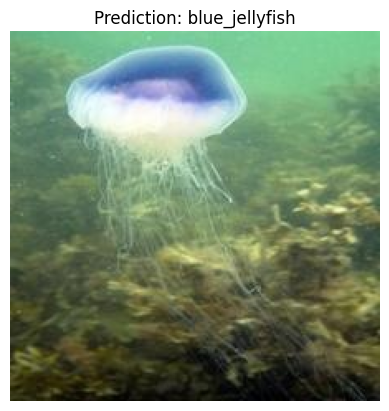

In [ ]:
# 필요한 모듈 호출함
from PIL import Image
import matplotlib.pyplot as plt

# 이미지 경로 매크로(하드코딩 줄인다.)
image_path = '/content/drive/MyDrive/AIFFEL_DLTHON/Train_Test_Valid/test/blue_jellyfish/10.jpg'

# 학습시 사용한 transform으로 동일하게 전처리, 배치차원 추가, GPU or CPU 에 맞게 올림
image = Image.open(image_path).convert('RGB')
input_image = transform(image).unsqueeze(0).to(device)

# 모델의 가중치를 불러옴, 추론모드 전환
model.load_state_dict(torch.load("/content/drive/MyDrive/AIFFEL_DLTHON/jellyfish-efficientnet-b0.pth"))
model.eval()

with torch.no_grad(): # 추론 중에 역전파 계산 필요없으므로 메모리,속도 향상
    output= model(input_image) # 전처리된 input_image를 모델에 입력
    pred = output.argmax(1).item() # 가장 큰 로직 값을 가진 클래스 인덱스 반환

# 예측결과 확인
class_name = train_dataset.classes[pred]
print(f"예측 결과: {class_name}")

# 시각화 및 화면 출력
plt.imshow(image)
plt.title(f"Prediction: {class_name}")
plt.axis('off')
plt.show()

In [ ]:
#전체 test data 평가

# 필요한 라이브러리 불러오기
from torchvision import datasets
from torch.utils.data import DataLoader

# 루트 경로에 있는 이미지들을 자동분류, 이미지 전처리
# 한번에 32장씩 처리하며 순서를 섞을 필요가 없어 거짓
test_dataset = datasets.ImageFolder(root=data_dir + '/test', transform=transform)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle=False)

# 저장된 모델의 가중치를 불러옴, 모델을 추론 모드로 전환함
model.load_state_dict(torch.load("/content/drive/MyDrive/AIFFEL_DLTHON/jellyfish-efficientnet-b0.pth"))
model.eval()

# 초기화
test_correct= 0

with torch.no_grad(): # 추론시 그레이디언트 계산이 필요하지 않음
    for images, labels in test_loader: # 이미지와 라벨을 테스트로더로부터 불러옴
        images, labels = images.to(device), labels.to(device) # 이미지와 라벨을 GPU or CPU에 올림
        outputs = model(images) # 모델에 입력을 넣어 예측값을 얻음
        test_correct += (outputs.argmax(1) == labels).sum().item() # 예측한 클래스의 인덱스,맞춘 갯수,누적

# 테스트 정확도 화면 출력
test_acc = test_correct / len(test_loader.dataset)
print(f"Test 정확도: {test_acc*100:.2f}%")

Test 정확도: 82.50%


#EfficientNet 결과 히트맵으로 나타내기

In [ ]:
# grad-cam 설치
!pip install grad-cam

In [ ]:
# 필요한 라이브러리,프레임워크 호출
import torch
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from efficientnet_pytorch import EfficientNet

In [ ]:
# GPU or CPU 장비 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = EfficientNet.from_pretrained('efficientnet-b0') # 사전학습된 에피션트넷 호출
model._fc = torch.nn.Linear(model._fc.in_features, 6) # 마지막 레이어를 6개의 클래스에 맞게 재정의함
model.load_state_dict(torch.load('/content/drive/MyDrive/AIFFEL_DLTHON/jellyfish-efficientnet-b0.pth')) # 학습을 마친 모델의 파라미터 호출 및 적용
model = model.to(device) # GPU or CPU로 모델을 보냄
model.eval() # 추론모드 설정

Loaded pretrained weights for efficientnet-b0


EfficientNet(
  (_conv_stem): Conv2dStaticSamePadding(
    3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
    (static_padding): ZeroPad2d((0, 1, 0, 1))
  )
  (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dStaticSamePadding(
        32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
        (static_padding): ZeroPad2d((1, 1, 1, 1))
      )
      (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dStaticSamePadding(
        32, 8, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_se_expand): Conv2dStaticSamePadding(
        8, 32, kernel_size=(1, 1), stride=(1, 1)
        (static_padding): Identity()
      )
      (_project_conv): Conv2dStaticSamePadding(
        32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False
    

In [ ]:
# 단일 이미지를 열고 RGB로 변환함
image_path = '/content/drive/MyDrive/AIFFEL_DLTHON/Train_Test_Valid/test/compass_jellyfish/04.jpg'
image = Image.open(image_path).convert('RGB')

transform = transforms.Compose([
    transforms.Resize((224,224)), # 에피션트넷 입력 크기
    transforms.ToTensor(), # PIL 이미지를 텐서로 변환함
    transforms.Normalize(mean=[0.485, 0.456, 0.406], # 이미지넷 기준 정규화하기
                         std = [0.229, 0.224, 0.225])
])

input_tensor = transform(image).unsqueeze(0).to(device) # 배치차원 추가

rgb_img = transforms.ToTensor()(image).permute(1,2,0).numpy() # 원본 이미지의 RGB배열 준비

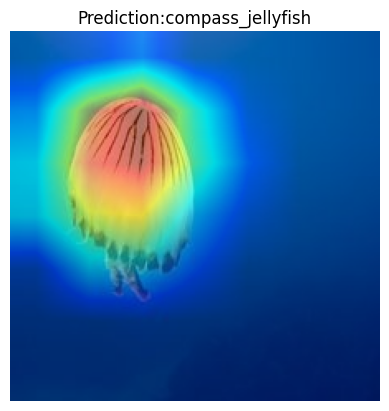

In [ ]:
# grad-cam에 필요한 라이브러리,프레임워크 호출
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam import GradCAM

# grad-cam 시각화를 위한 타겟 레이어 설정, [-1]은 마지막 블록을 선택한 것임
target_layer = model._blocks[-1]._project_conv

# grad-cam 객체 생성
cam = GradCAM(model=model, target_layers=[target_layer])

# 모델의 출력, 가장 높은 로짓값을 가진 클래스 인덱스 선택, 텐서를 파이선 정수로 변환
output = model(input_tensor)
pred_class = output.argmax(1).item()

# 어떤 클래스에 대해 주목한 영역을 시각화할지 정함, 그레이스케일 마스크를 반환
targets= [ClassifierOutputTarget(pred_class)]
grayscale_cam = cam(input_tensor= input_tensor, targets=targets) [0]

# grad-cam 마스크를 원본 이미지 위에 덧씌우는 역할을 함
visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)

# 화면 출력
plt.imshow(visualization)
plt.title(f"Prediction:{train_dataset.classes[pred_class]}")
plt.axis('off')
plt.show()